In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import KFold
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from IPython.display import display, clear_output

In [2]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [3]:
app_test = pd.read_csv(DATASET_DIR / "application_test.csv")
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")

description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

In [4]:
# logistische Regression
params = {
    "random_state" : 0,
    "max_iter" : 500
}

# # Entscheidungsbaum
# params = {
#     "random_state" : 0,
# }

In [5]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [6]:
app_test = pd.read_csv(DATASET_DIR / "application_test.csv")
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")

description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

In [7]:
features = ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_1', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'AMT_CREDIT', 'NAME_INCOME_TYPE', 'DAYS_ID_PUBLISH', 'FLAG_DOCUMENT_3', 'LIVINGAREA_AVG', 'REGION_RATING_CLIENT', 'APARTMENTS_AVG', 'REG_CITY_NOT_WORK_CITY', 'AMT_ANNUITY', 'FLAG_EMP_PHONE', 'DAYS_REGISTRATION', 'OCCUPATION_TYPE', 'FLOORSMAX_AVG', 'OWN_CAR_AGE', 'AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE', 'YEARS_BEGINEXPLUATATION_AVG', 'ORGANIZATION_TYPE', 'REG_CITY_NOT_LIVE_CITY', 'ELEVATORS_AVG', 'HOUR_APPR_PROCESS_START', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'DEF_30_CNT_SOCIAL_CIRCLE', 'BASEMENTAREA_AVG', 'DEF_60_CNT_SOCIAL_CIRCLE', 'ENTRANCES_AVG', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'LANDAREA_AVG', 'YEARS_BUILD_AVG', 'LIVINGAPARTMENTS_AVG', 'CNT_FAM_MEMBERS', 'OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'CNT_CHILDREN', 'COMMONAREA_AVG', 'NONLIVINGAREA_AVG', 'AMT_REQ_CREDIT_BUREAU_QRT', 'NAME_FAMILY_STATUS', 'NONLIVINGAPARTMENTS_AVG', 'EMERGENCYSTATE_MODE', 'HOUSETYPE_MODE', 'FLOORSMIN_AVG', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'FLAG_WORK_PHONE', 'NAME_TYPE_SUITE', 'NAME_HOUSING_TYPE', 'LIVE_CITY_NOT_WORK_CITY', 'AMT_REQ_CREDIT_BUREAU_MON', 'WALLSMATERIAL_MODE', 'WEEKDAY_APPR_PROCESS_START', 'AMT_REQ_CREDIT_BUREAU_DAY', 'FLAG_PHONE', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'FONDKAPREMONT_MODE', 'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_5', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_15', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_9', 'FLAG_EMAIL', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_13', 'FLAG_MOBIL', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12']
m_heads = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
heads = [head for head in features if head in m_heads]

In [8]:
data = {
        "auc":[],
        "auc_adj":[],
        "p" : [],
        "n": []
       }

auc_temp = 0
heads_gain = []

for i, h in enumerate(heads):
    clear_output(wait=True)
    print(i, len(heads))
    
    heads_gain.append(h)
    
    X = app_train[heads_gain + ["TARGET"]]
    X = X.fillna(0)
    y = X["TARGET"]
    x = X.drop(["TARGET"], axis=1)
    
    model = LogisticRegression(**params).fit(x, y)
    #model = DecisionTreeClassifier(**params).fit(x,y)
    #model = RandomForestClassifier(**params).fit(x,y)
    
    n = len(X)
    p = len(X.columns)
    
    aucs = []

    kfold = KFold(5, shuffle=True, random_state=1)

    # enumerate splits
    for i, (train, test) in enumerate(kfold.split(x)):

        model.fit(x.iloc[train], y.iloc[train])
        #auc = roc_auc_score(y.iloc[test], model.decision_function(x.iloc[test]))
        auc = roc_auc_score(y.iloc[test], model.predict_proba(x.iloc[test])[:,1])
        aucs.append(auc)
    
    auc = np.mean(aucs)
    auc_adj = 1-(1-auc)*(n-1)/(n-p-1)
    
    if auc_adj > auc_temp:
        
        data["auc"].append(auc)
        data["auc_adj"].append(auc_adj)
        data["p"].append(p)
        data["n"].append(n)
        
        auc_temp = auc_adj
        
    else:
        heads_gain.remove(h)

40 41


In [9]:
df = pd.DataFrame(data)

         auc   auc_adj   p       n
12  0.700925  0.700912  14  307511


<AxesSubplot:>

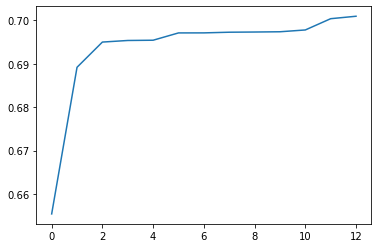

In [10]:
print(df[df["auc_adj"] == df["auc_adj"].max()])
df["auc_adj"].plot()

In [11]:
heads_gain

['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'EXT_SOURCE_1',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'FLOORSMAX_AVG',
 'REGION_POPULATION_RELATIVE',
 'ELEVATORS_AVG',
 'BASEMENTAREA_AVG',
 'ENTRANCES_AVG',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'FLOORSMIN_AVG']

In [12]:
X = app_train[["TARGET"] + heads_gain]
X = X.dropna()

In [13]:
y = X["TARGET"]
x = X.drop(["TARGET"], axis=1)

In [14]:
# logistisches Regressionsmodell
#model = LogisticRegression(**params)
#model = DecisionTreeClassifier(**params)
model = RandomForestClassifier(**params)

aucs = []

kfold = KFold(5, shuffle=True, random_state=1)
data = x

# enumerate splits
for i, (train, test) in enumerate(kfold.split(data)):
    
    model.fit(x.iloc[train], y.iloc[train])
    #auc = roc_auc_score(y.iloc[test], model.decision_function(x.iloc[test]))
    auc = roc_auc_score(y.iloc[test], model.predict_proba(x.iloc[test])[:,1])
    aucs.append(auc)
    
    print('train: %s, test: %s, auc: %s' % (train, test, auc))

print("\n")
print("Durchschnitt: %.2f" % (np.mean(aucs)))
print("Standardabw.: %.2f" % (np.std(aucs)))
print("Varianz:      %.2f" % (np.var(aucs)))

TypeError: __init__() got an unexpected keyword argument 'max_iter'